# XGBOOST Classification

## Importing the libraries

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
# Ignore warnings
#warnings.filterwarnings("ignore")
# Your code with cross-validation and metric computation here
# Reset warnings to default behavior (optional)
#warnings.resetwarnings()



## Importing the dataset

In [41]:
"""dataset1 = pd.read_csv('training_data (3).csv')
dataset2 = pd.read_csv('training_data_targets (1).csv', names=['Class'])


y = dataset2.iloc[:,:]
print(X)
print(y)"""

dataset1 = pd.read_csv('training_data (3).csv')
dataset2 = pd.read_csv('training_data_targets (1).csv', names=['Class'])
combined_dataset = pd.concat([dataset1, dataset2], axis=1)
X = dataset1.drop(columns=[ 'PhysHlth','PhysActivity','Fruits','AnyHealthcare','NoDocbcCost','Income',
                          'Sex','Smoker','HvyAlcoholConsump','MentHlth','DiffWalk']).iloc[0:,:].values
#X.head()
X1 = dataset1.iloc[:,:]
y1 = dataset2.iloc[:,:]
C = combined_dataset.iloc[:,:]
#print(C)
#X = dataset1.iloc[:,:]
y = dataset2.values
#y.head()
#X = combined_dataset.iloc[0:,:].values
unique_classes, class_counts = np.unique(y, return_counts=True)

# Print the unique classes and their corresponding counts
for label, count in zip(unique_classes, class_counts):
    print(f"Class {label}: {count} instances")


Class 0: 192333 instances
Class 1: 4168 instances
Class 2: 31811 instances


## Bar chart for number of classes

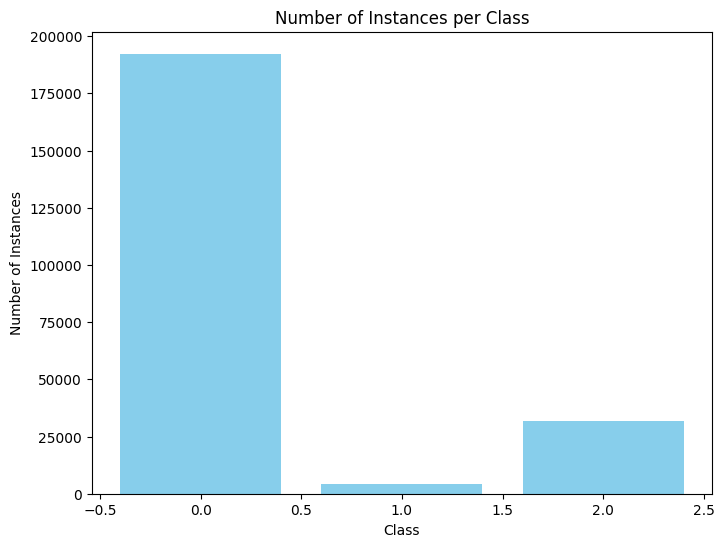

In [42]:
plt.figure(figsize=(8, 6))
plt.bar(unique_classes, class_counts, color='skyblue')
plt.xlabel('Class')
plt.ylabel('Number of Instances')
plt.title('Number of Instances per Class')
plt.show()

## Covariance matrix

<Axes: >

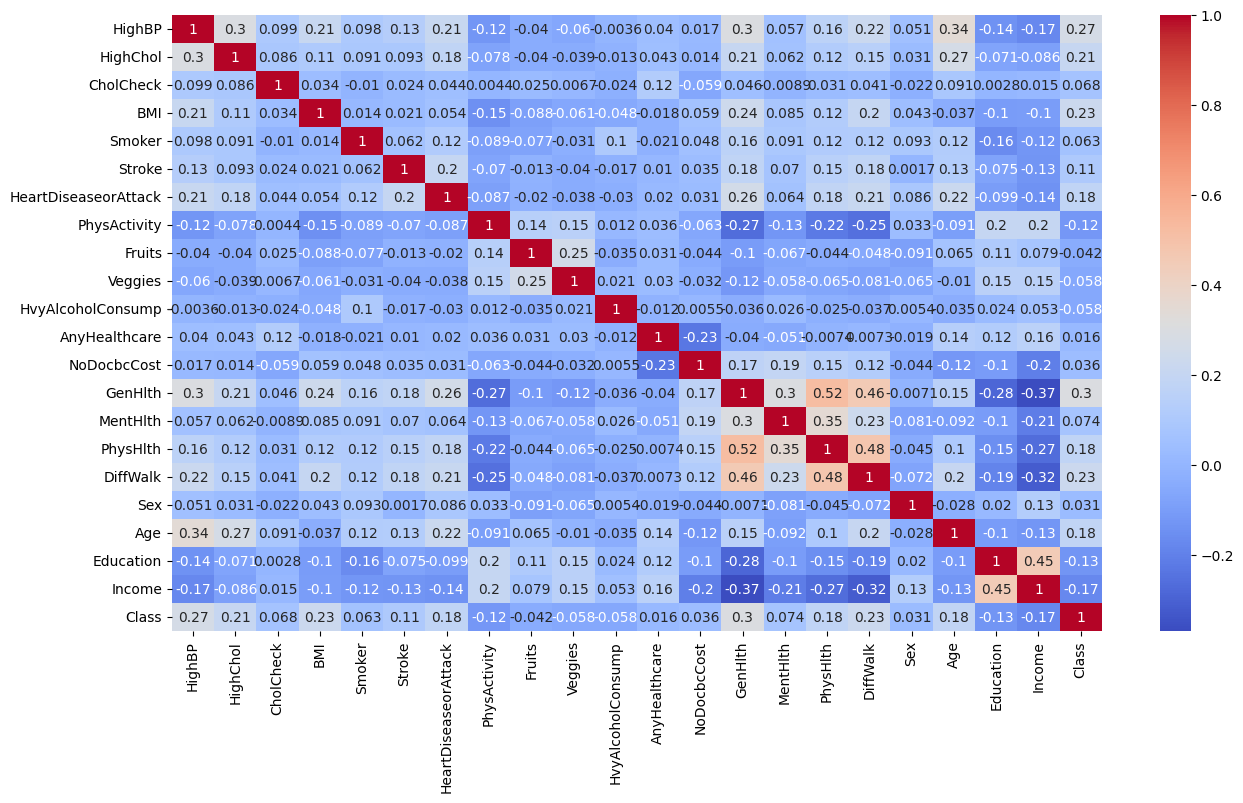

In [43]:
corr=combined_dataset.corr()
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [44]:
df=pd.concat([dataset1, dataset2], axis=1)
df.describe()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Class
count,228312.000000,228312.000000,228312.00000,228312.000000,228312.000000,228312.000000,228312.000000,228312.000000,228312.000000,228312.000000,...,228312.000000,228312.000000,228312.000000,228312.000000,228312.000000,228312.000000,228312.000000,228312.000000,228312.000000,228312.000000
mean,0.429014,0.424660,0.96274,28.387535,0.443380,0.040620,0.094358,0.756535,0.634093,0.811560,...,0.084043,2.510569,3.178755,4.236987,0.168243,0.439942,8.036849,5.050357,6.054548,0.296918
std,0.494936,0.494292,0.18940,6.617483,0.496785,0.197408,0.292326,0.429174,0.481685,0.391064,...,0.277453,1.068077,7.403429,8.716479,0.374083,0.496381,3.053697,0.985780,2.070492,0.698156
min,0.000000,0.000000,0.00000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,1.00000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000,0.000000
50%,0.000000,0.000000,1.00000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000,0.000000
75%,1.000000,1.000000,1.00000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000,0.000000
max,1.000000,1.000000,1.00000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000,2.000000


## Feature Importance and Selection

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model=ExtraTreesClassifier()
model.fit(X1,y1)

<ipython-input-45-07e6d4269ae9>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X1,y1)


In [ ]:
#print(model.feature_importances_)

In [ ]:
feat_importances=pd.Series(model.feature_importances_,index=X1.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

## Pair Plots

In [ ]:
sns.scatterplot(data=combined_dataset,x='BMI',y='Age',hue='Class')
plt.show()

## Density Plot or Distribution Plot

In [ ]:
sns.FacetGrid(combined_dataset,hue="Class",height=5).map(sns.histplot,"BMI",kde=True).add_legend()
plt.show()

## Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 12345,stratify=y)

In [ ]:
print(X_train)

In [ ]:
print(y_train)

In [ ]:
print(X_test)

In [ ]:
print(y_test)

## Oversampling using imbalanced-learn

In [ ]:
from collections import Counter
from imblearn import over_sampling
from imblearn.over_sampling import RandomOverSampler
sampling_strategy = {
    0: 173840,  # Desired number of samples for class 0
    1: 190000,  # Desired number of samples for class 1
    2: 170000   # Desired number of samples for class 2
}
ros= RandomOverSampler(sampling_strategy=sampling_strategy,random_state=0)
X_train,y_train=ros.fit_resample(X_train,y_train)
print(sorted(Counter(y_train).items()),y_train.shape)

## Oversampling using SMOTE

In [ ]:
"""from collections import Counter
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=0)
X_train, y_train = smote.fit_resample(X_train, y_train)
print(sorted(Counter(y_train).items()), y_train.shape)"""

## Undersampling

In [ ]:
"""from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
# Check the class distribution before undersampling
#print("Class distribution before undersampling:", Counter(y_train))
sampling_strategy = {
    0: 3400,  # Desired number of samples for class 0
    1: 3303,  # Desired number of samples for class 1
    2: 3000   # Desired number of samples for class 2
}
# Create a RandomUnderSampler object
rus = RandomUnderSampler(sampling_strategy=sampling_strategy, random_state=42)

# Fit and apply RandomUnderSampler to the training data
X_train, y_train = rus.fit_resample(X_train, y_train)

# Check the class distribution after undersampling
print("Class distribution after undersampling:", Counter(y_train))
"""

## Min Max Scaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print(X_train)
print(X_test)

## Applying PCA

In [ ]:
"""from sklearn.decomposition import PCA
pca=PCA(n_components=11)
X_train=pca.fit_transform(X_train)
X_test=pca.transform(X_test)
print(X_train)
print(X_test)"""



## Training the XGBoost classification model on the training set

In [ ]:
"""gamma=0.1,learning_rate= 0.7,max_depth= 4,min_child_weight= 3,n_estimators= 500"""
from xgboost import XGBClassifier
classifier1 = XGBClassifier(n_estimators=100,objective='multi:softmax',max_depth=3,max_delta_step=1,
                           gamma=0.1,subsample=1.0,colsample_bytree=1.0,learning_rate=0.3,min_child_weight=1

    )

classifier1.fit(X_train, y_train)


In [ ]:
y_pred1 = classifier1.predict(X_test)
cm1 = confusion_matrix(y_test, y_pred1)
print("XGBOOST")
print(cm1)
recall_per_class1 = recall_score(y_test, y_pred1, average=None)
precision_per_class1 = precision_score(y_test, y_pred1, average=None)
macro_avg_precision1 = precision_per_class1.mean()
macro_avg_recall1 = recall_per_class1.mean()
f11 = f1_score(y_test, y_pred1, average=None)
macro_avg_f11 = f11.mean()
print("Macro-averaged Precision:", macro_avg_precision1)
print("Macro-averaged Recall:", macro_avg_recall1)
print("Macro-averaged F1 Score:", macro_avg_f11)
print("Precision Score:", precision_per_class1)
print("Recall Score:", recall_per_class1)
print("F1 Score:", f11)

## Training light gbm classification model on the training set

In [ ]:
import lightgbm as lgb
classifier2 = lgb.LGBMClassifier()
classifier2.fit(X_train, y_train)

In [ ]:
y_pred2 = classifier2.predict(X_test)
cm2 = confusion_matrix(y_test, y_pred2)
print(cm2)
recall_per_class2 = recall_score(y_test, y_pred2, average=None)
precision_per_class2 = precision_score(y_test, y_pred2, average=None)
macro_avg_precision2 = precision_per_class2.mean()
macro_avg_recall2 = recall_per_class2.mean()
f12 = f1_score(y_test, y_pred2, average=None)
macro_avg_f12 = f12.mean()
print("Macro-averaged Precision:", macro_avg_precision2)
print("Macro-averaged Recall:", macro_avg_recall2)
print("Macro-averaged F1 Score:", macro_avg_f12)
print("Precision Score:", precision_per_class2)
print("Recall Score:", recall_per_class2)
print("F1 Score:", f12)

## Training the Decision tree classifier model on the training set

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier3 = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier3.fit(X_train, y_train)

In [ ]:
y_pred3 = classifier3.predict(X_test)
cm3 = confusion_matrix(y_test, y_pred3)
print("DECISION TREE")
print(cm3)
recall_per_class3 = recall_score(y_test, y_pred3, average=None)
precision_per_class3 = precision_score(y_test, y_pred3, average=None)
macro_avg_precision3 = precision_per_class3.mean()
macro_avg_recall3 = recall_per_class3.mean()
f13 = f1_score(y_test, y_pred3, average=None)
macro_avg_f13 = f13.mean()
print("Macro-averaged Precision:", macro_avg_precision3)
print("Macro-averaged Recall:", macro_avg_recall3)
print("Macro-averaged F1 Score:", macro_avg_f13)
print("Precision Score:", precision_per_class3)
print("Recall Score:", recall_per_class3)
print("F1 Score:", f13)

## Training the bagging classifier on the training set

In [ ]:
#from lightgbm import LGBMClassifier
base_classifier = XGBClassifier(n_estimators=100,objective='multi:softmax',max_depth=3,max_delta_step=1,
                           gamma=0.1,subsample=1.0,colsample_bytree=1.0,learning_rate=0.3,min_child_weight=1)
from sklearn.ensemble import BaggingClassifier
bagging_params = {
    'base_estimator': base_classifier,
}
classifier4 = BaggingClassifier(**bagging_params)
classifier4.fit(X_train,y_train)

In [ ]:
y_pred4 = classifier4.predict(X_test)
cm4 = confusion_matrix(y_test, y_pred4)
print("BAGGING WITH XGBOOST")
print(cm4)
recall_per_class4 = recall_score(y_test, y_pred4, average=None)
precision_per_class4 = precision_score(y_test, y_pred4, average=None)
macro_avg_precision4 = precision_per_class4.mean()
macro_avg_recall4 = recall_per_class4.mean()
f14 = f1_score(y_test, y_pred4, average=None)
macro_avg_f14 = f14.mean()
print("Macro-averaged Precision:", macro_avg_precision4)
print("Macro-averaged Recall:", macro_avg_recall4)
print("Macro-averaged F1 Score:", macro_avg_f14)
print("Precision Score:", precision_per_class4)
print("Recall Score:", recall_per_class4)
print("F1 Score:", f14)

## Random Forest Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier5 = RandomForestClassifier(n_estimators = 25, criterion = 'gini', random_state = 0)
classifier5.fit(X_train, y_train)

In [ ]:
y_pred5 = classifier5.predict(X_test)
cm5= confusion_matrix(y_test, y_pred5)
print("RANDOM FOREST")
print(cm5)
recall_per_class5 = recall_score(y_test, y_pred5, average=None)
precision_per_class5 = precision_score(y_test, y_pred5, average=None)
macro_avg_precision5 = precision_per_class5.mean()
macro_avg_recall5 = recall_per_class5.mean()
f15 = f1_score(y_test, y_pred5, average=None)
macro_avg_f15 = f15.mean()
print("Macro-averaged Precision:", macro_avg_precision5)
print("Macro-averaged Recall:", macro_avg_recall5)
print("Macro-averaged F1 Score:", macro_avg_f15)
print("Precision Score:", precision_per_class5)
print("Recall Score:", recall_per_class5)
print("F1 Score:", f15)

## Logistic Regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier6 = LogisticRegression(random_state = 0)
classifier6.fit(X_train, y_train)

In [ ]:
y_pred6 = classifier6.predict(X_test)
cm6= confusion_matrix(y_test, y_pred6)
print("LOGISTIC REGRESSION")
print(cm6)
recall_per_class6 = recall_score(y_test, y_pred6, average=None)
precision_per_class6 = precision_score(y_test, y_pred6, average=None)
macro_avg_precision6 = precision_per_class6.mean()
macro_avg_recall6 = recall_per_class6.mean()
f16 = f1_score(y_test, y_pred6, average=None)
macro_avg_f16 = f16.mean()
print("Macro-averaged Precision:", macro_avg_precision6)
print("Macro-averaged Recall:", macro_avg_recall6)
print("Macro-averaged F1 Score:", macro_avg_f16)
print("Precision Score:", precision_per_class6)
print("Recall Score:", recall_per_class6)
print("F1 Score:", f16)

## Predicting the Test set results

In [ ]:
#y_pred = classifier.predict(X_test)
#print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

## Making the Confusion Matrix

In [ ]:

"""cm = confusion_matrix(y_test, y_pred)
print(cm)
recall_per_class = recall_score(y_test, y_pred, average=None)
precision_per_class = precision_score(y_test, y_pred, average=None)
macro_avg_precision = precision_per_class.mean()
macro_avg_recall = recall_per_class.mean()
f1 = f1_score(y_test, y_pred, average=None)
macro_avg_f1 = f1.mean()
print("Macro-averaged Precision:", macro_avg_precision)
print("Macro-averaged Recall:", macro_avg_recall)
print("Macro-averaged F1 Score:", macro_avg_f1)
print("Precision Score:", precision_per_class)
print("Recall Score:", recall_per_class)
print("F1 Score:", f1)"""

## Appllying k-fold cross validation




In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score, StratifiedKFold




## Grid Search for XGBoost

In [ ]:
params={
    "learning_rate" : [0.05,0.1,0.2,0.3,0.4,0.7],
    "max_depth": [2,3,4,5,6],
    "min_child_weight":[1, 3,5],
    "n_estimators":[100,200,500,1000],
    "gamma":[0.0,0.1]
}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
grid_search=GridSearchCV(estimator=classifier1,param_grid=params,scoring='f1_macro',
                                 verbose=3,n_jobs=-1, cv=5)

In [ ]:
grid_search.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=False)

In [ ]:
best_classifier=grid_search.best_estimator_

In [ ]:
best_params=grid_search.best_params_

## XGBoost best classifer confusion matrix

In [ ]:
best_classifier.fit(X_train, y_train)
y_predf = best_classifier.predict(X_test)
cmf = confusion_matrix(y_test, y_predf)
print("XGBOOST")
print(cmf)

recall_per_classf = recall_score(y_test, y_predf, average=None)
precision_per_classf = precision_score(y_test, y_predf, average=None)
macro_avg_precisionf = precision_per_classf.mean()
macro_avg_recallf = recall_per_classf.mean()
f1f = f1_score(y_test, y_pred1, average=None)
macro_avg_f1f = f1f.mean()

print("Macro-averaged Precision:", macro_avg_precisionf)
print("Macro-averaged Recall:", macro_avg_recallf)
print("Macro-averaged F1 Score:", macro_avg_f1f)
print("Precision Score:", precision_per_classf)
print("Recall Score:", recall_per_classf)
print("F1 Score:", f1f)